In [67]:
import plotly.express as px
import numpy as np
df = px.data.gapminder(year=2007).set_index("country")[["gdpPercap", "lifeExp"]]
df["gdpPercap"] = np.log(df["gdpPercap"])

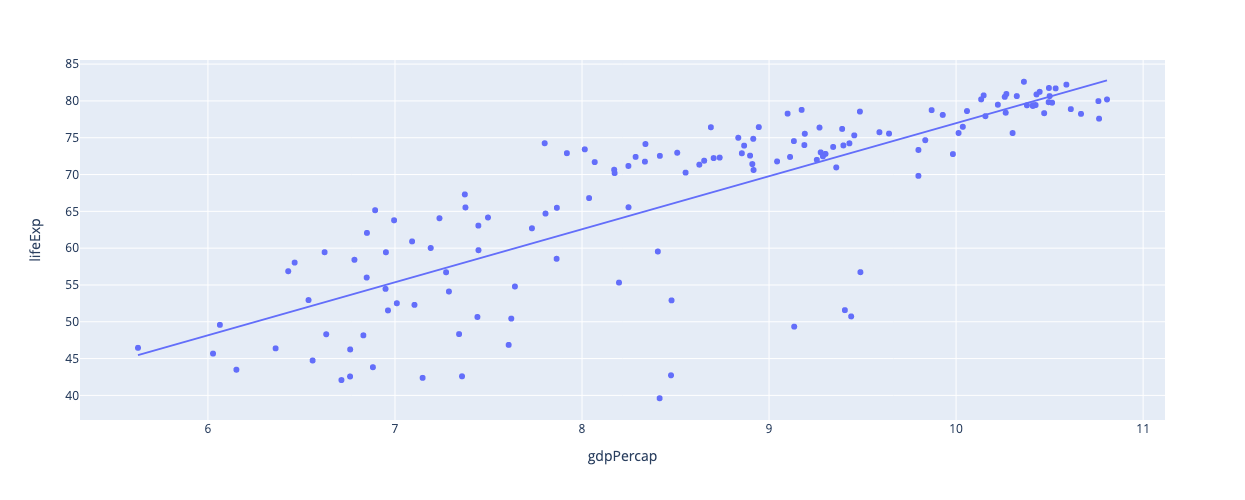

In [70]:
fig = px.scatter(df, x="gdpPercap", y="lifeExp", trendline="ols", width=500, height=500)
fig

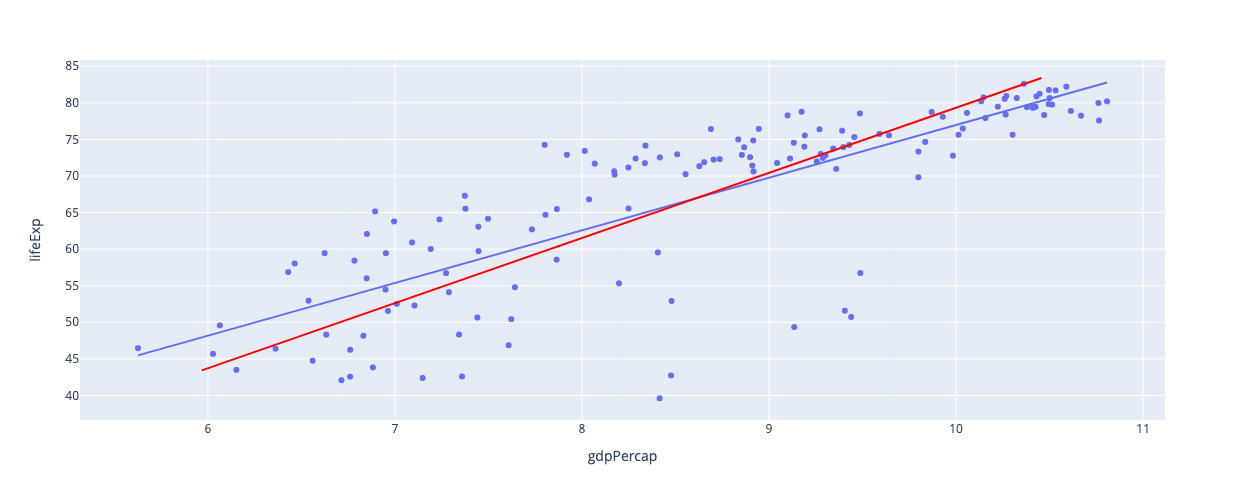

In [71]:
import statsmodels.api as sm

fig.add_traces(
    px.line(
        
        sm.PCA(df).project(ncomp=1), 
        
        x="gdpPercap", y="lifeExp").update_traces(line_color="red").data
)

In [72]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T


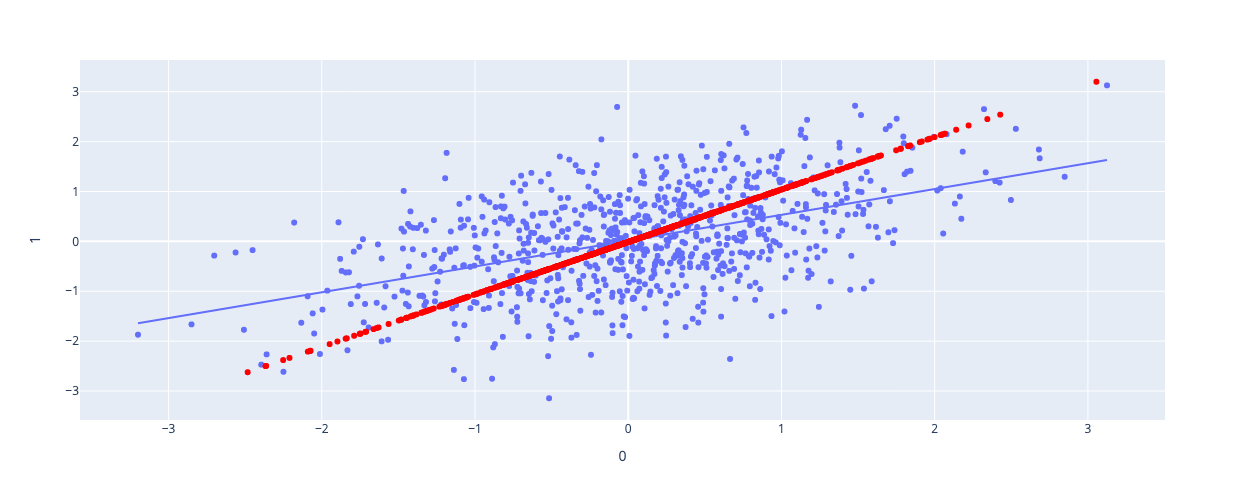

In [76]:
cov = np.array([[1, 0.5], [0.5, 1]])
X = np.random.multivariate_normal([0, 0], cov, size=800)

fig = px.scatter(X,x=0,y=1, trendline="ols")
fig.add_traces(
    px.scatter(sm.PCA(X).project(ncomp=1),x=0,y=1).update_traces(marker_color="red").data, 
).update_layout(width=500, height=500)

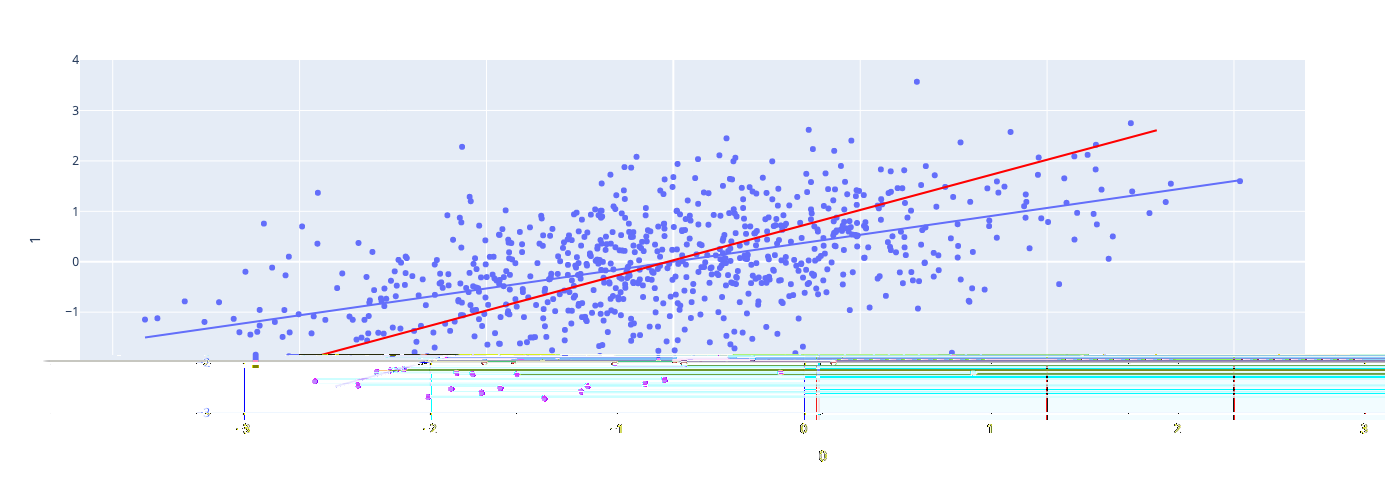

In [55]:
cov = np.array([[1, 0.5], [0.5, 1]])
X = np.random.multivariate_normal([0, 0], cov, size=800)

fig = px.scatter(X,x=0,y=1, trendline="ols")
fig.add_traces(
    px.line(sm.PCA(X).project(ncomp=1) ,x=0,y=1).update_traces(line_color="red").data, 
).update_layout(width=500, height=500)